In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob, os

### Consolidando todos os arquivos

In [2]:
arquivos = glob.glob("C:\\Users\\gabriel\\Desktop\\analysis\\Dados IML\\*.xls")
df = pd.DataFrame()

for file in arquivos:
    df_2 = pd.read_csv(file, sep='\t', encoding='UTF-16 LE')
    df = pd.concat([df, df_2])

### Análise exploratória IML
Os dados foram extraídos da Secretaria de Segurança de São Paulo [SSP](http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx) no perído de 2020-2022

In [3]:
df.head()

,DataEntradaIML,AnoBO,NumeroBO,NomeDelegaciaOrigem,NumeroLaudo,AnoLaudo,IdadeVitima,TipoIdade,Conclusao,DeclaracaoObito,CausaMortis
0,31/01/2020 09:27:00,2019,395010,DEP. HOM. PROTECAO PESSOA,37123,2020,43,ANOS,NaN,275500560.0,EXAME COMPLEMENTAR AO LAUDO 395010 / 2019 INST...
1,18/01/2020 12:04:00,2020,387,02 DEL. SEC. CAMPINAS,21311,2020,34,ANOS,NaN,291254616.0,"Choque Hipovolêmico, em decorrência de Anemia ..."
2,22/01/2020 16:20:00,2019,92,DEL. SEC. CAMPINAS,26562,2020,56,ANOS,NaN,290810833.0,"Asfixia mecânica Asfixia Mecânica Pura, de aco..."
3,18/01/2020 09:23:00,2020,385,04 D.P. - CAMPINAS,21173,2020,89,ANOS,NaN,291254608.0,"Insuficiência Respiratória Aguda, em decorrênc..."
4,02/01/2020 10:36:00,2019,1087,D.P. INV GER CRUZEIRO,914,2020,24,ANOS,NaN,290034914.0,Anemia aguda por hemorragia interna traumática...


In [4]:
df.tail()

,DataEntradaIML,AnoBO,NumeroBO,NomeDelegaciaOrigem,NumeroLaudo,AnoLaudo,IdadeVitima,TipoIdade,Conclusao,DeclaracaoObito,CausaMortis
1896,30/09/2022 16:02:00,2022,DU0797-1,DEL. POL. NOVO HORIZONTE,352531,2022,63,ANOS,NaN,323007546.0,Indeterminada
1897,30/09/2022 16:14:00,2022,HD5572-1,D.P. INV GER CRUZEIRO,352570,2022,0,NaN,NaN,323361455.0,Carbonização
1898,30/09/2022 16:24:00,2022,HD7844-1,DEL. SEC. MARILIA,352584,2022,22,ANOS,NaN,340225033.0,tromboembolia pulmonar
1899,30/09/2022 17:35:00,2018,5073,01 D.P. - JUNDIAI,352663,2022,56,ANOS,NaN,289011540.0,Politraumatismo ACIDENTE DE TRÂNSITO PRÉVIO
1900,30/09/2022 18:01:00,2022,HE0486-1,DEL. POL. CASTILHO,352690,2022,41,ANOS,NaN,322619122.0,"Asfixia mecânica Constrição cervical, compatív..."


In [5]:
df.shape

(71421, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71421 entries, 0 to 1900
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DataEntradaIML       71421 non-null  object 
 1   AnoBO                71421 non-null  int64  
 2   NumeroBO             71218 non-null  object 
 3   NomeDelegaciaOrigem  71359 non-null  object 
 4   NumeroLaudo          71421 non-null  int64  
 5   AnoLaudo             71421 non-null  int64  
 6   IdadeVitima          71421 non-null  int64  
 7   TipoIdade            63954 non-null  object 
 8   Conclusao            0 non-null      float64
 9   DeclaracaoObito      71353 non-null  object 
 10  CausaMortis          71421 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 6.5+ MB


In [7]:
df.describe()

,AnoBO,NumeroLaudo,AnoLaudo,IdadeVitima,Conclusao
count,71421.000000,71421.000000,71421.000000,71421.000000,0.0
mean,2020.964044,216914.351353,2021.050937,42.030537,NaN
std,0.955402,125362.625550,0.829371,24.231591,NaN
min,1999.000000,3.000000,2020.000000,0.000000,NaN
25%,2020.000000,107999.000000,2020.000000,25.000000,NaN
50%,2021.000000,216127.000000,2021.000000,42.000000,NaN
75%,2022.000000,320877.000000,2022.000000,59.000000,NaN
max,2022.000000,464707.000000,2022.000000,230.000000,NaN


#### Equalizando o nome das colunas

In [8]:
df = df.rename(columns={'DataEntradaIML': 'dt_entrada_iml', 'AnoBO': 'ano_registro_bo', 'NumeroBO': 'nm_bo', 'NomeDelegaciaOrigem': 'desc_delegacia_origem', 'NumeroLaudo': 'nm_laudo', 'AnoLaudo': 'ano_laudo', 'IdadeVitima': 'idade_vitima', 'TipoIdade': 'tp_idade', 'Conclusao': 'dt_conclusao', 'DeclaracaoObito': 'declaracao_obito', 'CausaMortis': 'desc_causa_morte'})

#### Tratando valores iguais

In [9]:
df['desc_causa_morte'].loc[df['desc_causa_morte'] == 'Indeterminada.'] = 'Indeterminada'
df['desc_causa_morte'].loc[df['desc_causa_morte'] == 'INDETERMINADA'] = 'Indeterminada'
df['desc_causa_morte'].loc[df['desc_causa_morte'] == 'indeterminada'] = 'Indeterminada'
df['desc_causa_morte'].loc[df['desc_causa_morte'] == 'indeterminado'] = 'Indeterminada'

C:\Users\gabriel\AppData\Local\Temp\ipykernel_2060\2516843547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['desc_causa_morte'].loc[df['desc_causa_morte'] == 'Indeterminada.'] = 'Indeterminada'
C:\Users\gabriel\AppData\Local\Temp\ipykernel_2060\2516843547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['desc_causa_morte'].loc[df['desc_causa_morte'] == 'INDETERMINADA'] = 'Indeterminada'
C:\Users\gabriel\AppData\Local\Temp\ipykernel_2060\2516843547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

#### Alterando a tipagem de colunas

In [10]:
df['dt_entrada_iml'] = pd.to_datetime(df['dt_entrada_iml'], format='%d/%m/%Y %H:%M:%S')

### Idade da vítima

In [11]:
df['tp_idade'].value_counts()

ANOS     63768
MESES      132
DIAS        54
Name: tp_idade, dtype: int64

In [12]:
df_anos = df[df['tp_idade'] == 'ANOS']

In [13]:
df_anos['idade_vitima'].describe()

count    63768.000000
mean        47.045321
std         20.527091
min          0.000000
25%         31.000000
50%         45.000000
75%         62.000000
max        108.000000
Name: idade_vitima, dtype: float64

<Axes: xlabel='idade_vitima', ylabel='Count'>

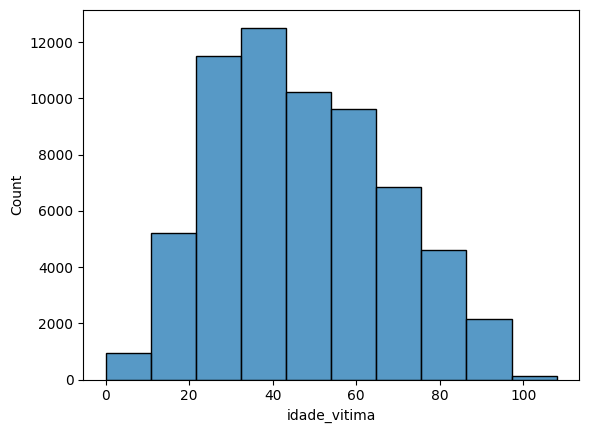

In [14]:
sns.histplot(df_anos['idade_vitima'], bins=10)

<Axes: xlabel='idade_vitima'>

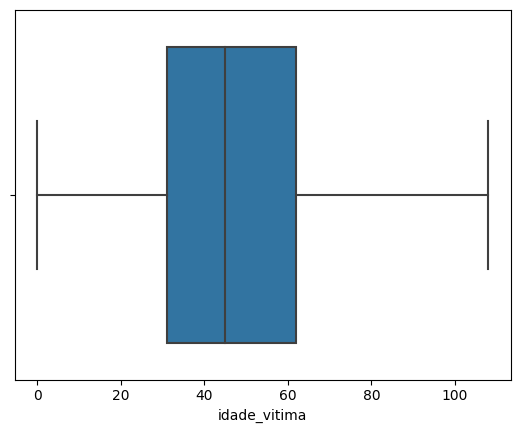

In [15]:
sns.boxplot(x='idade_vitima', data=df_anos)

#### Idade <= 30

In [16]:
df_idade_menor_30 = df_anos[(df_anos['idade_vitima'] >= 0.0) & (df_anos['idade_vitima'] <= 30.0)]

<Axes: xlabel='idade_vitima', ylabel='Count'>

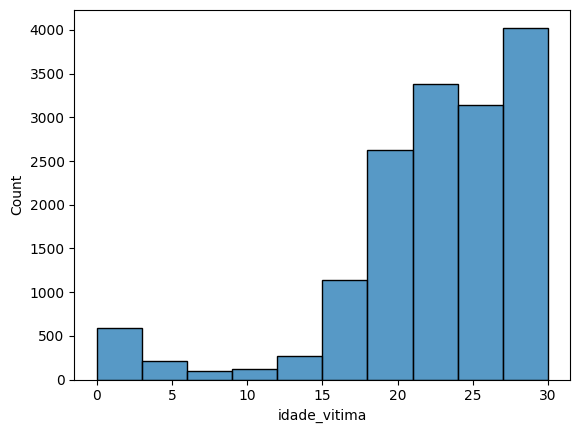

In [17]:
sns.histplot(df_idade_menor_30['idade_vitima'], bins=10)

<Axes: >

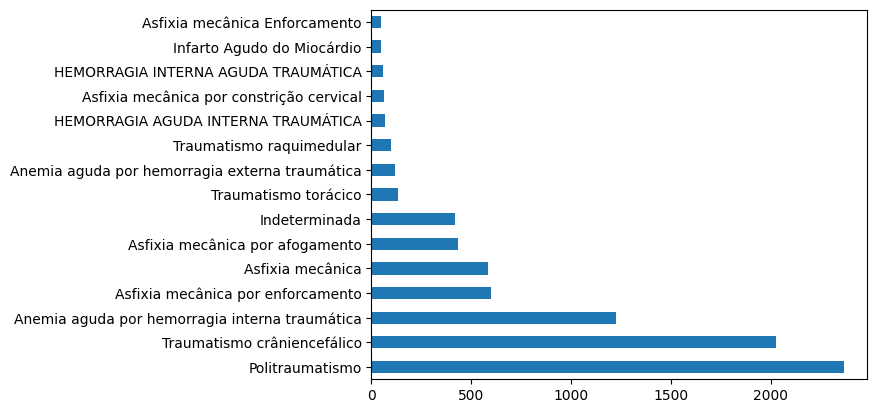

In [18]:
df_idade_menor_30['desc_causa_morte'].value_counts().head(15).plot(kind='barh')

<Axes: xlabel='idade_vitima'>

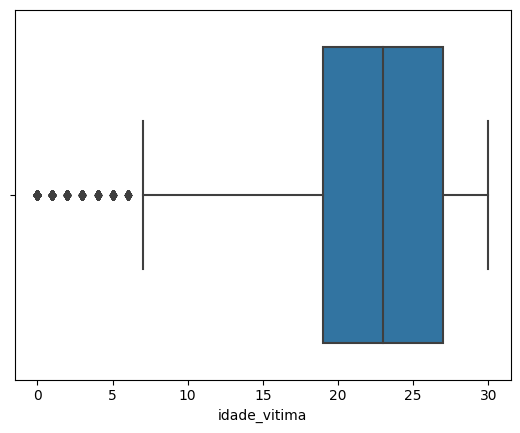

In [19]:
sns.boxplot(x='idade_vitima', data=df_idade_menor_30)

#### Idade <= 10

In [20]:
df_idade_menor_10 = df_anos[(df_anos['idade_vitima'] >= 0.0) & (df_anos['idade_vitima'] <= 10.0)]

<Axes: xlabel='idade_vitima', ylabel='Count'>

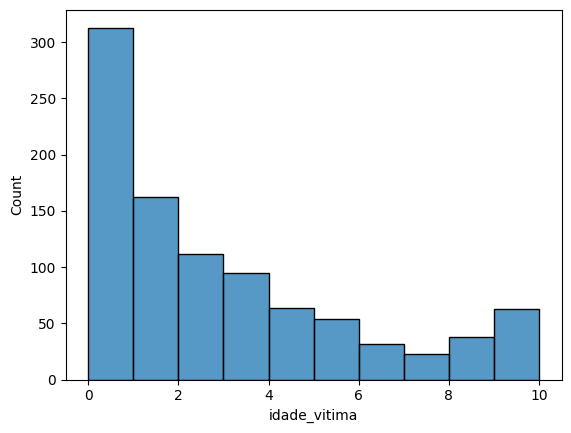

In [21]:
sns.histplot(df_idade_menor_10['idade_vitima'], bins=10)

<Axes: >

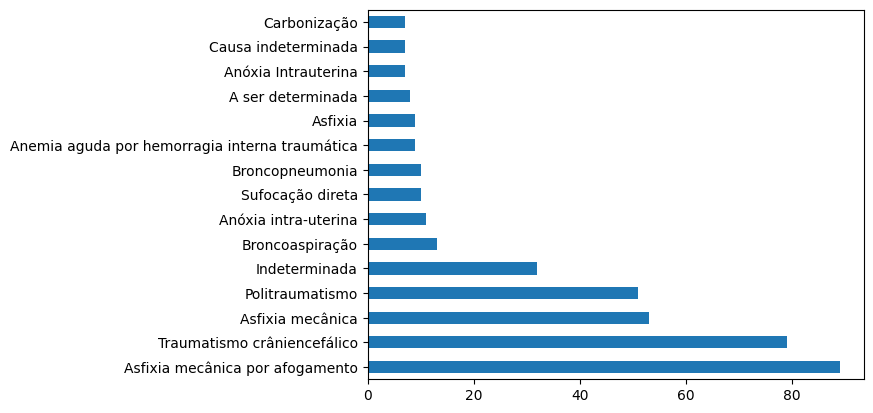

In [22]:
df_idade_menor_10['desc_causa_morte'].value_counts().head(15).plot(kind='barh')

#### Idade > 30 E < 60

In [23]:
df_idade_maior_30_60 = df_anos[(df_anos['idade_vitima'] > 30) & (df_anos['idade_vitima'] <= 60)]

<Axes: xlabel='idade_vitima', ylabel='Count'>

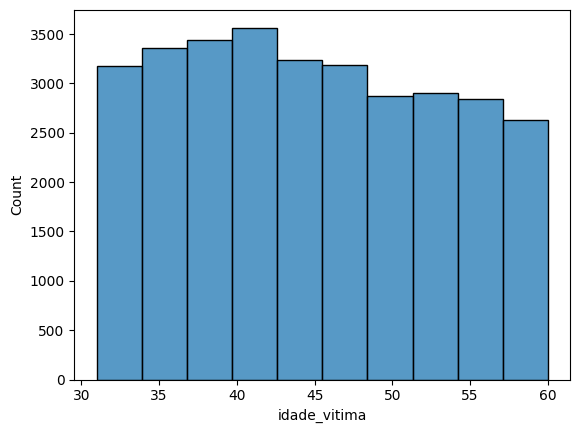

In [24]:
sns.histplot(df_idade_maior_30_60['idade_vitima'], bins=10)

<Axes: >

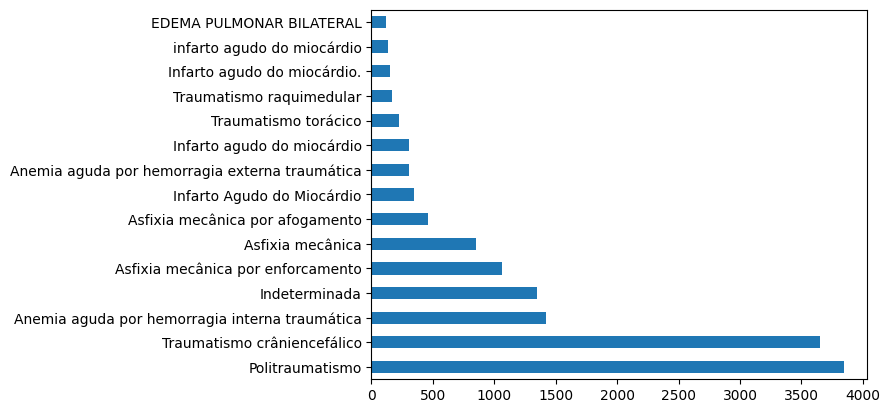

In [25]:
df_idade_maior_30_60['desc_causa_morte'].value_counts().head(15).plot(kind='barh')

<Axes: xlabel='idade_vitima'>

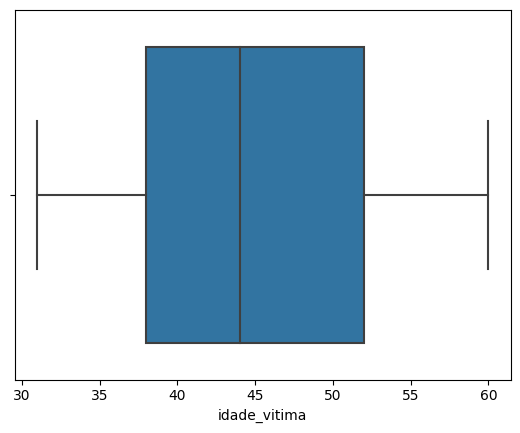

In [26]:
sns.boxplot(x='idade_vitima', data=df_idade_maior_30_60)

### Idade > 60 E < 100

In [27]:
df_idade_maior_60 = df_anos[(df_anos['idade_vitima'] > 60) & (df_anos['idade_vitima'] <= 100)]

<Axes: xlabel='idade_vitima', ylabel='Count'>

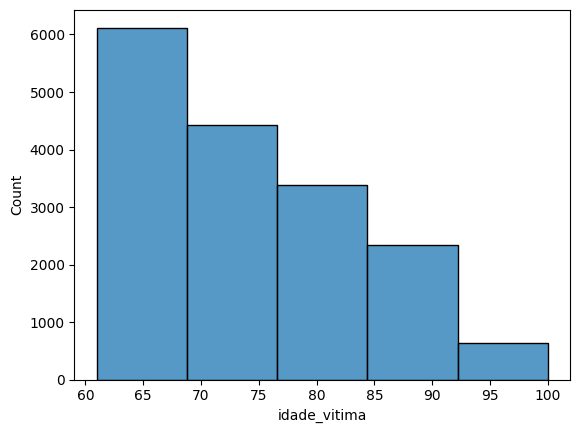

In [28]:
sns.histplot(df_idade_maior_60['idade_vitima'], bins=5)

<Axes: >

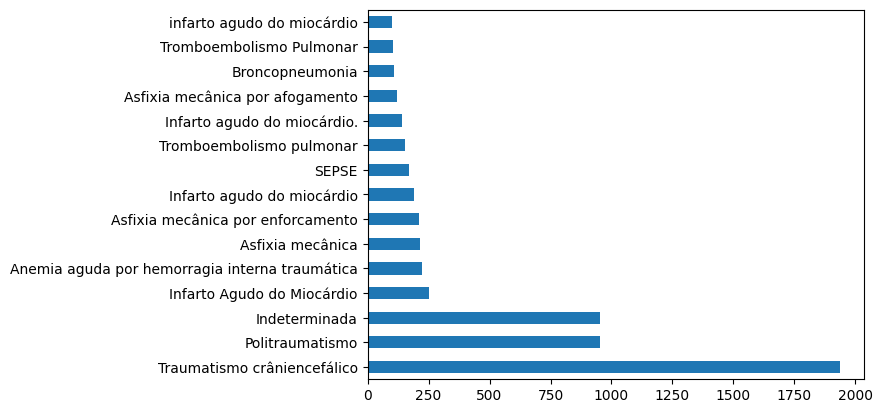

In [29]:
df_idade_maior_60['desc_causa_morte'].value_counts().head(15).plot(kind='barh')

<Axes: xlabel='idade_vitima'>

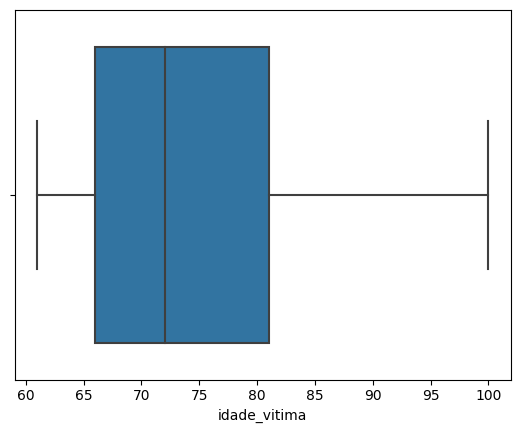

In [30]:
sns.boxplot(x='idade_vitima', data=df_idade_maior_60)

#### Idade > 100

In [31]:
df_idade_maior_100 = df_anos[(df_anos['idade_vitima'] > 100)]

<Axes: xlabel='idade_vitima', ylabel='Count'>

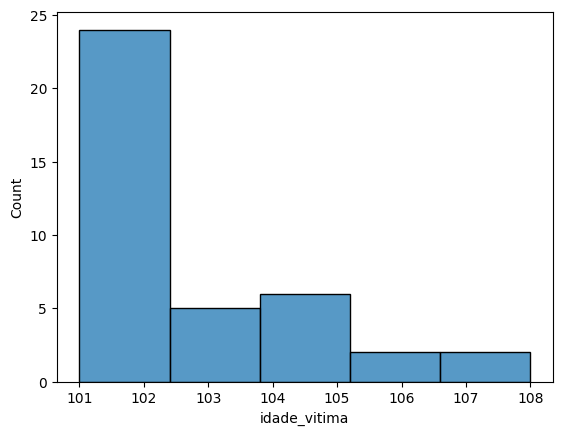

In [32]:
sns.histplot(df_idade_maior_100['idade_vitima'], bins=5)

<Axes: >

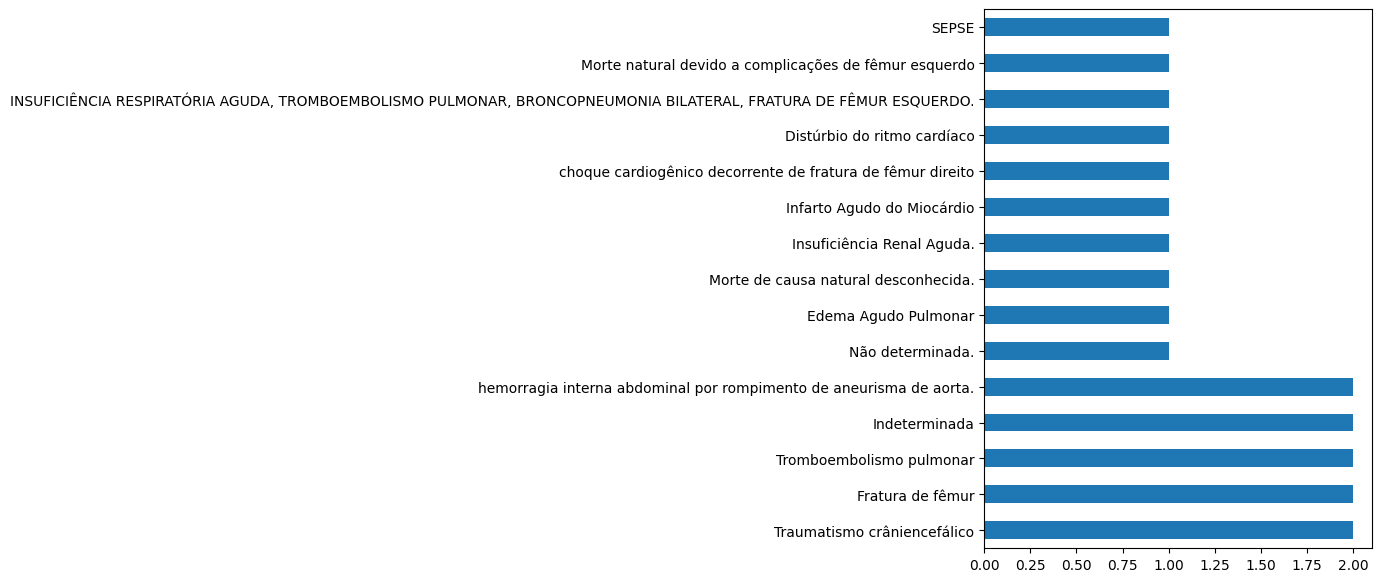

In [33]:
df_idade_maior_100['desc_causa_morte'].value_counts().head(15).plot(kind='barh', figsize=(5, 7))

#### Analisando tipo de idade = MESES
Os indivíduos que entraram no IML com o tipo MESES normalmente são bebes

In [34]:
df_meses = df[df['tp_idade'] == 'MESES']

<Axes: xlabel='idade_vitima', ylabel='Count'>

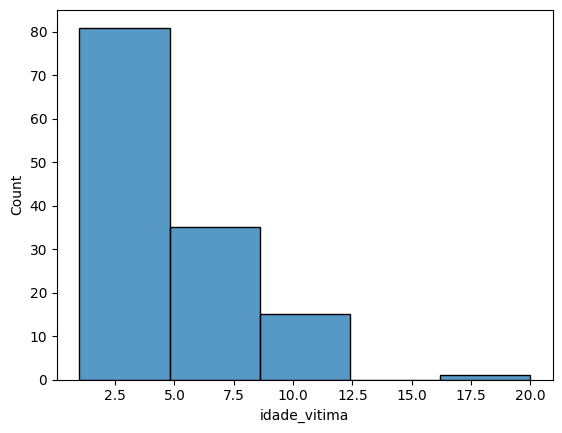

In [35]:
sns.histplot(df_meses['idade_vitima'], bins=5)

<Axes: >

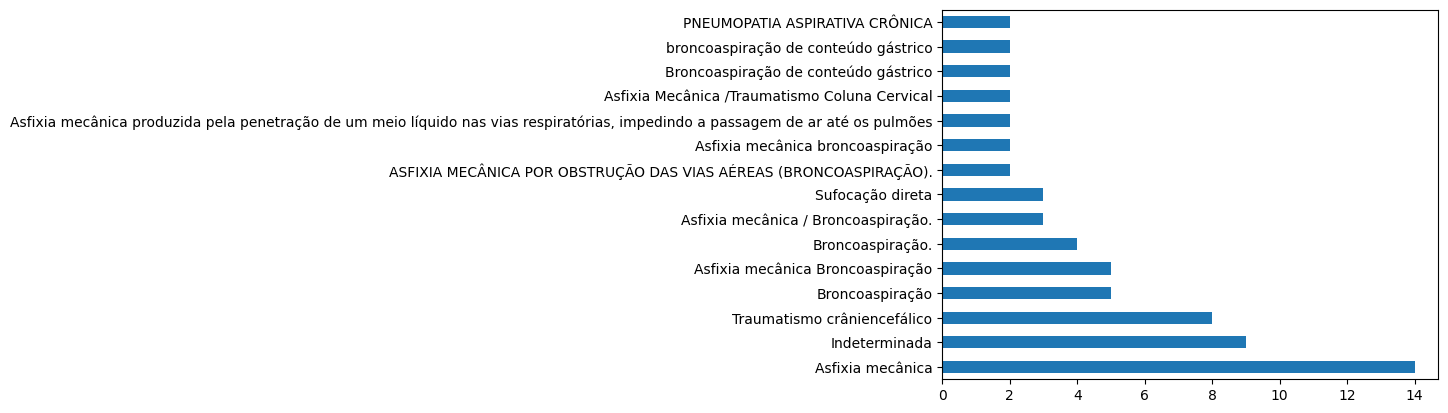

In [36]:
df_meses['desc_causa_morte'].value_counts().head(15).plot(kind='barh')

#### Analisando tipo de idade = DIAS
Os indivíduos que entraram no IML com o tipo MESES normalmente são bebes

In [37]:
df_dias = df[df['tp_idade'] == 'DIAS']

<Axes: xlabel='idade_vitima', ylabel='Count'>

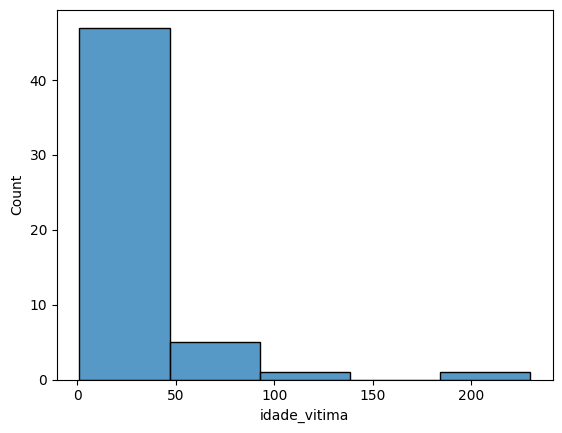

In [38]:
sns.histplot(df_dias['idade_vitima'], bins=5)

<Axes: >

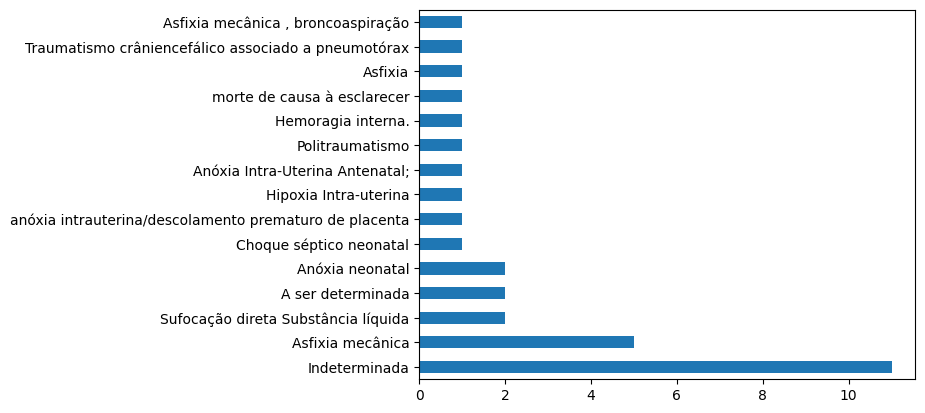

In [39]:
df_dias['desc_causa_morte'].value_counts().head(15).plot(kind='barh')

#### Data da entrada no IML

In [40]:
df['desc_dia_semana_entrada_iml'] = df['dt_entrada_iml'].dt.day_name()
df['dia_entrada_iml'] = df['dt_entrada_iml'].dt.strftime('%d')
df['anomes_entrada_iml'] = df['dt_entrada_iml'].dt.strftime('%Y-%m')
# df['dia_senama_entrada_iml'] = df['dt_entrada_iml'].dt.strftime('%m-%d')

In [44]:
df.head()

,dt_entrada_iml,ano_registro_bo,nm_bo,desc_delegacia_origem,nm_laudo,ano_laudo,idade_vitima,tp_idade,dt_conclusao,declaracao_obito,desc_causa_morte,desc_dia_semana_entrada_iml,dia_entrada_iml,anomes_entrada_iml
0,2020-01-31 09:27:00,2019,395010,DEP. HOM. PROTECAO PESSOA,37123,2020,43,ANOS,NaN,275500560.0,EXAME COMPLEMENTAR AO LAUDO 395010 / 2019 INST...,Friday,31,2020-01
1,2020-01-18 12:04:00,2020,387,02 DEL. SEC. CAMPINAS,21311,2020,34,ANOS,NaN,291254616.0,"Choque Hipovolêmico, em decorrência de Anemia ...",Saturday,18,2020-01
2,2020-01-22 16:20:00,2019,92,DEL. SEC. CAMPINAS,26562,2020,56,ANOS,NaN,290810833.0,"Asfixia mecânica Asfixia Mecânica Pura, de aco...",Wednesday,22,2020-01
3,2020-01-18 09:23:00,2020,385,04 D.P. - CAMPINAS,21173,2020,89,ANOS,NaN,291254608.0,"Insuficiência Respiratória Aguda, em decorrênc...",Saturday,18,2020-01
4,2020-01-02 10:36:00,2019,1087,D.P. INV GER CRUZEIRO,914,2020,24,ANOS,NaN,290034914.0,Anemia aguda por hemorragia interna traumática...,Thursday,02,2020-01


<Axes: xlabel='anomes_entrada_iml'>

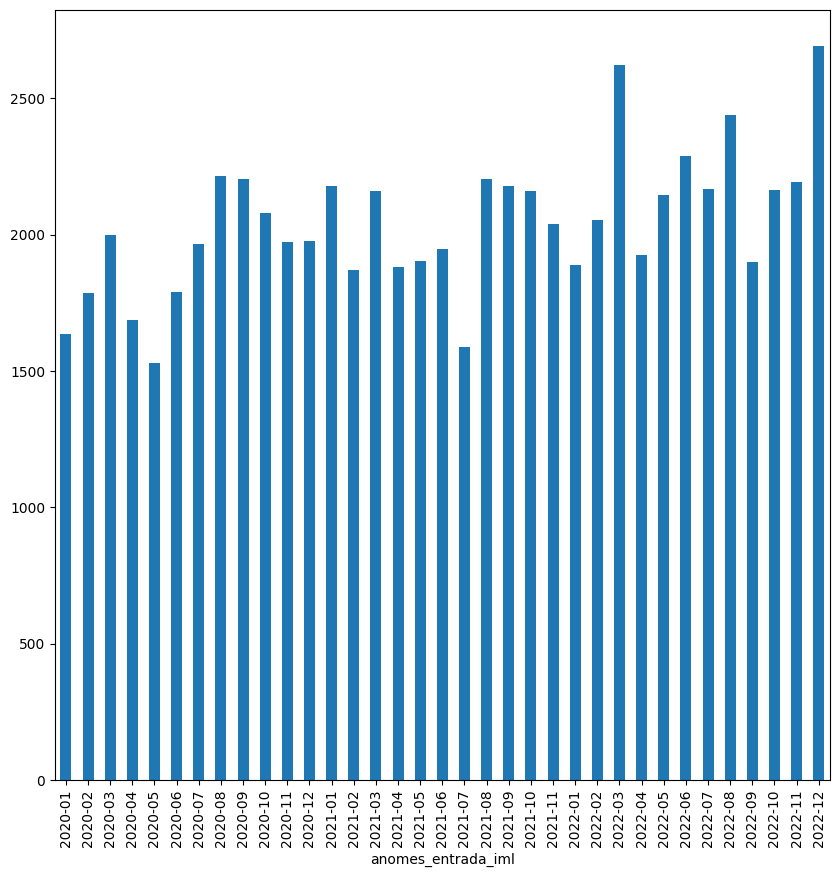

In [72]:
df_ordenado_anomes = df.sort_values('dt_entrada_iml',key=lambda x: pd.to_datetime(x, format='%Y-%m'))

dados.groupby('anomes_entrada_iml').size().plot(kind='bar', figsize=(10,10))